# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

In [40]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [41]:
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

In [42]:
dinosaurs.columns

Index(['occurrence_no', 'name', 'diet', 'type', 'length_m', 'max_ma', 'min_ma',
       'region', 'lng', 'lat', 'class', 'family'],
      dtype='object')

In [43]:
a=dinosaurs['name'].nunique()
a

1042

In [44]:
largest_dinosaur = dinosaurs[dinosaurs['length_m'] == dinosaurs['length_m'].max()]['length_m'].iloc[0]
print(f"The largest dinosaur is {largest_dinosaur}.")
missing_data = dinosaurs.isnull().sum().sum()
print(f"There are {missing_data} missing data points in the dataset.")

The largest dinosaur is 35.0.
There are 5592 missing data points in the dataset.


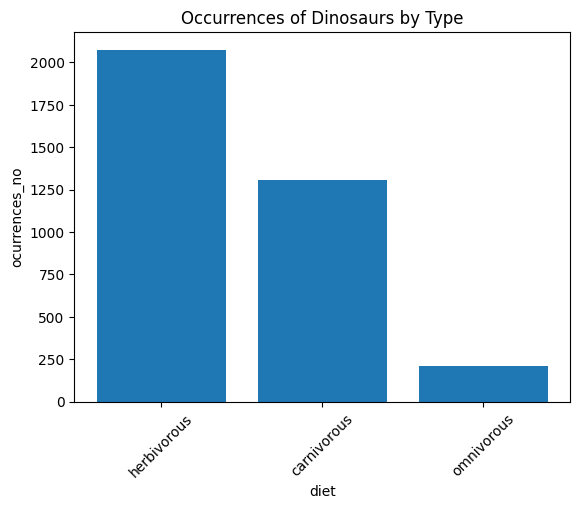

In [45]:
import matplotlib.pyplot as plt
dinosaur_type_counts = dinosaurs['diet'].value_counts()
plt.bar(dinosaur_type_counts.index, dinosaur_type_counts.values)
plt.xlabel('diet')
plt.ylabel('ocurrences_no')
plt.title('Occurrences of Dinosaurs by Type')
plt.xticks(rotation=45)  
plt.show()


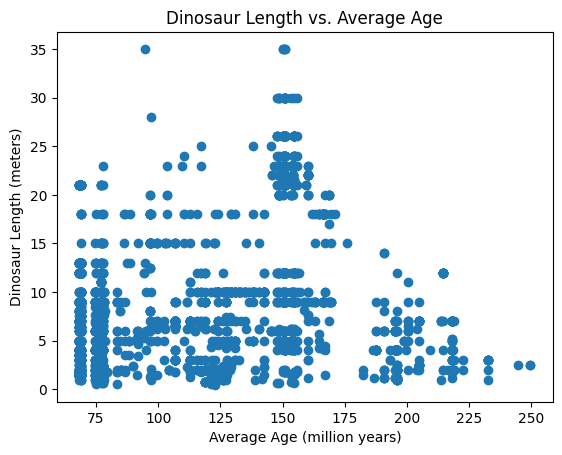

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
dinosaurs['age_y'] = (dinosaurs['max_ma'] + dinosaurs['min_ma']) / 2
plt.scatter(dinosaurs['age_y'], dinosaurs['length_m'])
plt.xlabel('Average Age (million years)')
plt.ylabel('Dinosaur Length (meters)')
plt.title('Dinosaur Length vs. Average Age')
plt.show()


In [47]:
dinosaurs.columns

Index(['occurrence_no', 'name', 'diet', 'type', 'length_m', 'max_ma', 'min_ma',
       'region', 'lng', 'lat', 'class', 'family', 'age_y'],
      dtype='object')

In [52]:
import plotly.express as px
fig = px.scatter_mapbox(dinosaurs, lat='lat', lon='lng', hover_name='name')
fig.update_layout(mapbox_style='open-street-map')
fig.show()


# 2️⃣ Part 2 (SQL) - Understanding movie data 🎥 

## 📖 Background
You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

In [55]:
SELECT * 
FROM cinema.films
LIMIT 10

,id,title,release_year,country,duration,language,certification,gross,budget
0,1,Intolerance: Love's Struggle Throughout the Ages,1916,USA,123,,Not Rated,NaN,385907.0
1,2,Over the Hill to the Poorhouse,1920,USA,110,,,3000000.0,100000.0
2,3,The Big Parade,1925,USA,151,,Not Rated,NaN,245000.0
3,4,Metropolis,1927,Germany,145,German,Not Rated,26435.0,6000000.0
4,5,Pandora's Box,1929,Germany,110,German,Not Rated,9950.0,NaN
5,6,The Broadway Melody,1929,USA,100,English,Passed,2808000.0,379000.0
6,7,Hell's Angels,1930,USA,96,English,Passed,NaN,3950000.0
7,8,A Farewell to Arms,1932,USA,79,English,Unrated,NaN,800000.0
8,9,42nd Street,1933,USA,89,English,Unrated,2300000.0,439000.0
9,10,She Done Him Wrong,1933,USA,66,English,Approved,NaN,200000.0


## 💪 Challenge II
Help your team leader understand the data that's available in the _cinema.films_ dataset. Include:

1. How many movies are present in the database?
2. There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies? (Don't forget you can use the AI assistant!)
6. Any other insights you found during your analysis? 

In [64]:
SELECT count (DISTINCT id) AS num_movies
FROM cinema.films;


,num_movies
0,4968


In [60]:
SELECT COUNT(*) AS num_missing_rows
FROM cinema.films
WHERE gross IS NULL OR budget IS NULL;


,num_missing_rows
0,1076


In [61]:
SELECT COUNT(DISTINCT certification) AS num_certifications
FROM cinema.films;


,num_certifications
0,13


In [63]:
SELECT country, COUNT(*) AS num_movies_produced
FROM cinema.films
GROUP BY country
ORDER BY num_movies_produced DESC
LIMIT 5;


,country,num_movies_produced
0,USA,3750
1,UK,443
2,France,153
3,Canada,123
4,Germany,97


In [62]:
SELECT language, AVG(duration) AS avg_duration
FROM cinema.films
WHERE language IN ('English', 'French')
GROUP BY language;


,language,avg_duration
0,French,104.666667
1,English,107.636541
